#Upload and Reading the csv

In [140]:
import pandas as pd
from google.colab import files
# Upload file
uploaded = files.upload()
# Exception Handling
file_path = "/content/CAR DETAILS FROM CAR DEKHO.csv"
try:
    # Read the csv
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")
    exit()


Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO (3).csv
File loaded successfully!


#Data Preprocessing and Cleaning

In [141]:
""" Major concerns in the dataset:
1.Outlier detection (particularly in selling_price and km_driven) using I Q R Method
  and check for missing values
2.Extract brand from name to create new feature (brand)

3.Encoding categorical variables (like fuel, seller_type, etc.) using One-Hot encoding

4.Scaling (especially for km_driven and year) using Standard Scaler

5.Remove or drop not useful columms (like car_name) to simplify
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df=pd.read_csv(file_path)
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


1.checking for missing values

In [142]:
# Check for missing values
print(df.isnull().sum())


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [143]:
# checking columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [144]:
# checking rows and columns
df.shape

(4340, 8)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [146]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


2.Check for duplicated values and clean them

In [147]:
car_dup = df.duplicated().any()
print(car_dup)

True


In [148]:
# Check for duplicates (including the first occurrence)
duplicates = df[df.duplicated(keep=False)]

# Count duplicates for each unique row based on all columms and how many times they occur
duplicate_counts = duplicates.groupby(list(df.columns)).size()

# Print the rows that are duplicated based on all columms and how many times they occur
print("Rows with duplicate values:")
print(duplicates)

# Print the count of each duplicate entry (how many times each combination appears)
print("\nDuplicate counts (how many times each duplicate appears):")
print(duplicate_counts)

# If you want to see how many total duplicates exist (total number of duplicate rows):
total_duplicates = len(duplicates)
print(f"\nTotal number of duplicate rows: {total_duplicates}")


Rows with duplicate values:
                                 name  year  selling_price  km_driven    fuel  \
0                       Maruti 800 AC  2007          60000      70000  Petrol   
1            Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2                Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3              Datsun RediGO T Option  2017         250000      46000  Petrol   
4               Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
...                               ...   ...            ...        ...     ...   
4307                 Mahindra Xylo H4  2019         599000      15000  Diesel   
4308              Maruti Alto 800 LXI  2018         200000      35000  Petrol   
4309                 Datsun GO Plus T  2017         350000      10171  Petrol   
4310  Renault Duster 110PS Diesel RxL  2015         465000      41123  Diesel   
4311          Toyota Camry Hybrid 2.5  2017        1900000      20118  Petrol   


In [149]:
# Remove duplicate rows, keeping only the first occurrence
df_cleaned = df.drop_duplicates(keep='first')

# Optionally, reset the index after removing duplicates
df_cleaned = df_cleaned.reset_index(drop=True)

# Print the cleaned DataFrame (without duplicates)
print("\nDataFrame after removing duplicates:")
print(df_cleaned)


DataFrame after removing duplicates:
                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
3572  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
3573           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
3574                  Maruti 800 AC BSIII  2009         110000      83000   
3575     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
3576                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission

In [150]:
#Check if duplicates still exists
car_dup = df_cleaned.duplicated().any()
print(car_dup)

False


3. Outliers detection

In [151]:
# Remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# df_cleaned is the initial DataFrame
df_clean = remove_outliers_iqr(df_cleaned, 'selling_price')
df_clean = remove_outliers_iqr(df_clean, 'km_driven')
df_clean.shape

(3287, 8)

4a. Brand Feature extraction

In [152]:
df_clean['brand'] = df_clean['name'].str.split().str[0]
df_clean = df_clean.drop(columns=['name'])

In [153]:
print(df_clean.columns)
print(df_clean['brand'].unique())

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand'],
      dtype='object')
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Skoda' 'Toyota'
 'Mercedes-Benz' 'Mahindra' 'Ford' 'Nissan' 'Renault' 'Fiat' 'Volkswagen'
 'Audi' 'Mitsubishi' 'Daewoo' 'Force' 'OpelCorsa' 'BMW' 'Ambassador']


In [154]:
# Step 1: Count how many times each brand appears
brand_counts = df_clean['brand'].value_counts()

# Step 2: Find brands that appear less than 1% of the total rows
rare_brands = brand_counts[brand_counts < 0.01 * len(df_clean)].index

# Step 3: Replace those rare brands with the word 'Other'
df_clean['brand'] = df_clean['brand'].apply(lambda x: 'Other' if x in rare_brands else x)

4b.Convert Year into Car year

In [155]:
# Convert year to car age in the df_clean dataframe
# Assuming 'year' column exists in the original DataFrame (df)
df=pd.read_csv(file_path)
df_clean['car_age'] = 2025 - df['year']
# Drop 'year' column from df_clean dataframe
# If you intend to remove 'year' from df_clean as well
df_clean.drop('year', axis=1, inplace=True, errors='ignore')
# Print unique values of 'car_age' from df_clean
print(df_clean['car_age'].unique())


[18 13  8 11  9 10  7 12 14  6 15 16 19 29 20 17 21 27 22 23  5 25 26 24
 30 28 33]


5. Encoding

In [156]:
df_clean['owner'] = df['owner']
print(df_clean['owner'].unique())

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [157]:

# For owner, use ordinal encoding

owner_mapping = {'Test Drive Car': 0,'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
df_clean['owner'] = df_clean['owner'].map(owner_mapping)



# One-Hot encoding columns
df_encoded = pd.get_dummies(df_clean, columns=['fuel', 'seller_type', 'transmission','brand'],dtype=int)


In [158]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 0 to 3576
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   selling_price                 3287 non-null   int64
 1   km_driven                     3287 non-null   int64
 2   owner                         3287 non-null   int64
 3   car_age                       3287 non-null   int64
 4   fuel_CNG                      3287 non-null   int64
 5   fuel_Diesel                   3287 non-null   int64
 6   fuel_Electric                 3287 non-null   int64
 7   fuel_LPG                      3287 non-null   int64
 8   fuel_Petrol                   3287 non-null   int64
 9   seller_type_Dealer            3287 non-null   int64
 10  seller_type_Individual        3287 non-null   int64
 11  seller_type_Trustmark Dealer  3287 non-null   int64
 12  transmission_Automatic        3287 non-null   int64
 13  transmission_Manual           3287 non

6. Scaling : Creates a scaler object from StandardScaler() — which uses the formula:

𝑧
=
(
𝑥
−
𝜇
)
/
𝜎
𝑥
x = actual value,
𝜇
 = mean,
𝜎
 = standard deviation


6. Log Transform

In [159]:
# Log-transform 'selling_price'
df['selling_price_log'] = np.log1p(df['selling_price'])

# Log-transform 'km_driven'
df['km_driven_log'] = np.log1p(df['km_driven'])

In [160]:
#Preview final dataset
print("✅ Final preprocessed dataset shape:", df_encoded.shape)
df_encoded.head()

✅ Final preprocessed dataset shape: (3287, 27)


,selling_price,km_driven,owner,car_age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,brand_Hyundai,brand_Mahindra,brand_Maruti,brand_Nissan,brand_Other,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen
0,60000,70000,1,18,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,135000,50000,1,18,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,600000,100000,1,13,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,250000,46000,1,8,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,450000,141000,2,11,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
# Save the Cleaned Data
output_file = "/content/cleaned_data.csv"
df_encoded.to_csv(output_file, index=False)
print(f"\nCleaned dataset saved successfully as '{output_file}'!")

# Allow the user to download the file
files.download(output_file)



Cleaned dataset saved successfully as '/content/cleaned_data.csv'!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
import pandas as pd

# Load your new cleaned file
df_final = pd.read_csv("cleaned_data.csv")

# Quick overview
print("Shape of the dataset:", df_final.shape)
print("\nNull values in each column:\n", df_final.isnull().sum())
print("\nNumber of duplicate rows:", df_final.duplicated().sum())
print("\nData types:\n", df_final.dtypes)
print("\nFirst few rows:")
print(df_final.head())


Shape of the dataset: (3287, 27)

Null values in each column:
 selling_price                   0
km_driven                       0
owner                           0
car_age                         0
fuel_CNG                        0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Automatic          0
transmission_Manual             0
brand_Chevrolet                 0
brand_Ford                      0
brand_Honda                     0
brand_Hyundai                   0
brand_Mahindra                  0
brand_Maruti                    0
brand_Nissan                    0
brand_Other                     0
brand_Renault                   0
brand_Skoda                     0
brand_Tata                      0
brand_Toyota                    0
brand_Volkswagen                0
dtype: int64

Numbe

#Training

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
df = pd.read_csv("cleaned_data.csv")

# Split features and target
X = df.drop(columns=["selling_price"])
y = df["selling_price"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42
)

# Scale only numerical features
numerical_features = ["km_driven", "owner", "car_age"]
scaler = StandardScaler()

# Fit and transform numerical features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # slope

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 37430292851.40
Mean Absolute Error (MAE): 149314.81
R² Score: 0.4555


In [168]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define degree of the polynomial
degree = 2

# Create polynomial regression pipeline
poly_model = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    LinearRegression()
)

# Fit the model
poly_model.fit(X_train_scaled, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test_scaled)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree={degree})")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"R² Score: {r2_poly:.4f}")


Polynomial Regression (degree=2)
Mean Squared Error (MSE): 35552564174.67
Mean Absolute Error (MAE): 141199.32
R² Score: 0.4828


In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)  # No scaling needed!

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Regressor Results:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")


🌲 Random Forest Regressor Results:
Mean Squared Error (MSE): 39716308765.36
Mean Absolute Error (MAE): 147969.19
R² Score: 0.4222


#visual plot of linear regression

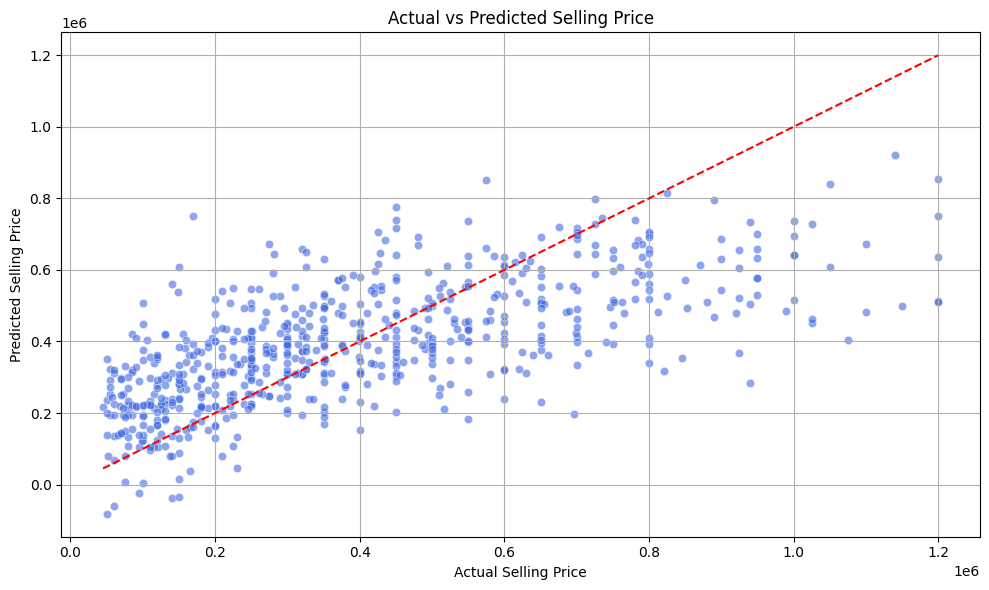

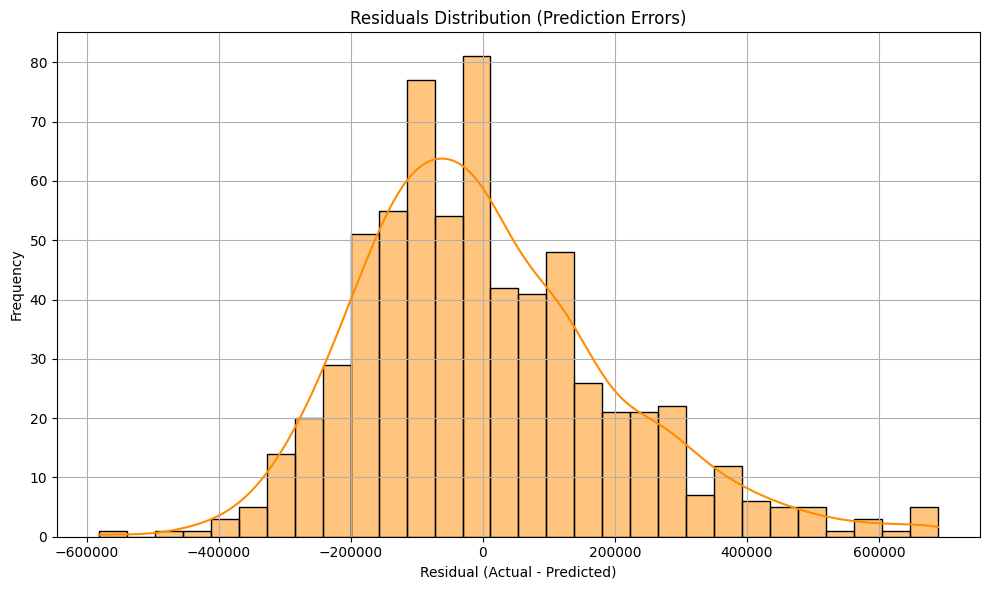

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title("Actual vs Predicted Selling Price")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot: Prediction Errors
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='darkorange', bins=30)
plt.title("Residuals Distribution (Prediction Errors)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
